# ML | Overview of Data Cleaning

```Better data beats fancier algorithms```

In [13]:
import pandas as pd
import numpy as np

# Load the dataset
df = pd.read_csv('Titanic-Dataset.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


#### Data Inspection and Exploration

In [14]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool

In [15]:
print(df.duplicated())

0      False
1      False
2      False
3      False
4      False
       ...  
886    False
887    False
888    False
889    False
890    False
Length: 891, dtype: bool


Check the data information using df.info()

In [16]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


Check the Categorical and Numerical Columns.

In [17]:
# Categorical columns
cat_col = [col for col in df.columns if df[col].dtype == 'object']
print('Categorical columns :',cat_col)
# Numerical columns
num_col = [col for col in df.columns if df[col].dtype != 'object']
print('Numerical columns :',num_col)

Categorical columns : ['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked']
Numerical columns : ['PassengerId', 'Survived', 'Pclass', 'Age', 'SibSp', 'Parch', 'Fare']


Check the total number of Unique Values in the Categorical Columns

In [18]:
df[cat_col].nunique()

Name        891
Sex           2
Ticket      681
Cabin       147
Embarked      3
dtype: int64

Let’s first print the 50 unique tickets.

In [19]:
df['Ticket'].unique()[:50]

array(['A/5 21171', 'PC 17599', 'STON/O2. 3101282', '113803', '373450',
       '330877', '17463', '349909', '347742', '237736', 'PP 9549',
       '113783', 'A/5. 2151', '347082', '350406', '248706', '382652',
       '244373', '345763', '2649', '239865', '248698', '330923', '113788',
       '347077', '2631', '19950', '330959', '349216', 'PC 17601',
       'PC 17569', '335677', 'C.A. 24579', 'PC 17604', '113789', '2677',
       'A./5. 2152', '345764', '2651', '7546', '11668', '349253',
       'SC/Paris 2123', '330958', 'S.C./A.4. 23567', '370371', '14311',
       '2662', '349237', '3101295'], dtype=object)

Drop Name and Ticket Columns

In [20]:
df1 = df.drop(columns=['Name','Ticket'])
df1.shape

(891, 10)

#### Handling Missing Data

Давайте перевіримо стовпці відсутніх значень для кожного рядка за допомогою df.isnull(). Він перевіряє, чи є значення нульовими чи ні, і повертає логічні значення, а sum() підсумовує загальну кількість рядків із нульовими значеннями, і ми ділимо її на загальну кількість рядків, присутніх у наборі даних, а потім множимо, щоб отримати значення, тобто на 100 значень, скільки значень є нульовими.

In [22]:
round((df1.isnull().sum()/df1.shape[0])*100,2)

PassengerId     0.00
Survived        0.00
Pclass          0.00
Sex             0.00
Age            19.87
SibSp           0.00
Parch           0.00
Fare            0.00
Cabin          77.10
Embarked        0.22
dtype: float64

Як ми бачимо з наведеного вище результату, Cabin має 77% нульових значень, Age має 19,87%, а Embarked має 0,22% нульових значень.

Отже, не варто заповнювати 77% нульових значень. Тож ми відкинемо колонку кабіни. Стовпець Embarked містить лише 0,22% нульових значень, тому ми видаляємо рядки нульових значень стовпця Embarked.

In [23]:
df2 = df1.drop(columns='Cabin')
df2.dropna(subset=['Embarked'], axis=0, inplace=True)
df2.shape

(889, 9)

Приписування відсутніх значень з минулих спостережень.

Знову ж таки, «відсутність» сама по собі майже інформативна, і ми повинні повідомити нашому алгоритму, якщо значення відсутнє.
Навіть якщо ми створюємо модель для приписування наших цінностей, ми не додаємо реальної інформації. ми лише посилюємо шаблони, які вже надані іншими функціями. Для цього випадку ми можемо використати вписання середнього значення або медіану .
Примітка:

Врахування `mean` підходить, коли дані розподілені нормально і не мають крайніх викидів.
Імпутування `median`  є кращим, якщо дані містять викиди або спотворені.

In [24]:
# Mean imputation
df3 = df2.fillna(df2.Age.mean())
# Let's check the null values again
df3.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

#### Handling Outliers

Викиди – це екстремальні значення, які значно відрізняються від більшості даних. Вони можуть негативно вплинути на аналіз і продуктивність моделі. Для обробки викидів можна використовувати такі методи, як кластеризація, інтерполяція або трансформація.

Щоб перевірити викиди, ми зазвичай використовуємо `box plot`.
`box plot` — це графічне представлення розподілу набору даних.
Він показує медіану змінної, квартилі та потенційні викиди.
Лінія всередині рамки позначає медіану, а сама рамка позначає інтерквартильний діапазон (IQR).
Ящичний графік поширюється на найбільш екстремальні невикидні значення в межах 1,5-кратного IQR.
Окремі точки за рамками вважаються потенційними викидами.
Коробчатий графік пропонує простий для розуміння огляд діапазону даних і дає змогу визначити викиди або асимметрию в розподілі.

Let’s plot the box plot for Age column data.

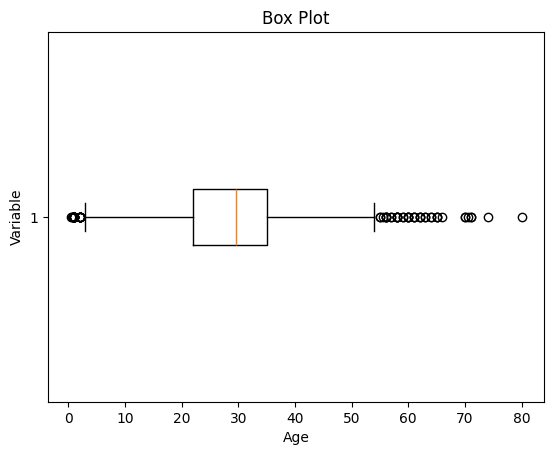

In [25]:
import matplotlib.pyplot as plt

plt.boxplot(df3['Age'], vert=False)
plt.ylabel('Variable')
plt.xlabel('Age')
plt.title('Box Plot')
plt.show()

Як ми бачимо з наведеної вище діаграми Box and whisker plot, наш набір даних про вік має значення, що виходять за межі.

Значення менше 5 і більше 55 є викидами.

In [33]:
# calculate summary statistics
mean = df3['Age'].mean()
print(mean)

29.642092696629216


In [32]:
std  = df3['Age'].std()
print(std)

12.968346294351779


In [31]:
# Calculate the lower and upper bounds
lower_bound = mean - std*2
upper_bound = mean + std*2

print('Lower Bound :',lower_bound)
print('Upper Bound :',upper_bound)

Lower Bound : 3.7054001079256587
Upper Bound : 55.57878528533277


In [34]:
# Drop the outliers
df4 = df3[(df3['Age'] >= lower_bound)
                & (df3['Age'] <= upper_bound)]

In [35]:
df4

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,male,22.000000,1,0,7.2500,S
1,2,1,1,female,38.000000,1,0,71.2833,C
2,3,1,3,female,26.000000,0,0,7.9250,S
3,4,1,1,female,35.000000,1,0,53.1000,S
4,5,0,3,male,35.000000,0,0,8.0500,S
...,...,...,...,...,...,...,...,...,...
886,887,0,2,male,27.000000,0,0,13.0000,S
887,888,1,1,female,19.000000,0,0,30.0000,S
888,889,0,3,female,29.642093,1,2,23.4500,S
889,890,1,1,male,26.000000,0,0,30.0000,C


Подібним чином ми можемо видалити викиди решти стовпців.